<a href="https://colab.research.google.com/github/cekbote/pytorch-tutorials/blob/master/Image_Classification_using_Logistic_Regression_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Logistic Regression in PyTorch

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset

# When this statement is executed for the first time, it downloads the data to 
# the data/ directory next to the notebook and creates a PyTorch Dataset. On 
# subsequent executions, the download is skipped as the data is already 
# downloaded. Let's check the size of the dataset.

dataset = MNIST(root='data/', download=True)
len(dataset)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


60000

In [3]:
# The dataset has 60,000 images which can be used to train the model. There is 
# also an additonal test set of 10,000 images which can be created by passing 
# train=False to the MNIST class.

test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [4]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD283394CC0>, 5)

In [5]:
# It's a pair, consisting of a 28x28 image and a label. The image is an object 
# of the class PIL.Image.Image, which is a part of the Python imaging library 
# Pillow. We can view the image within Jupyter using matplotlib, the de-facto 
# plotting and graphing library for data science in Python.

import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


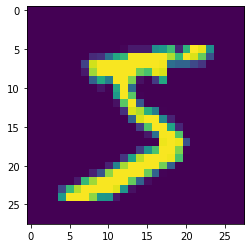

In [6]:
image, label = dataset[0]
plt.imshow(image)
print('Label:', label)

Label: 3


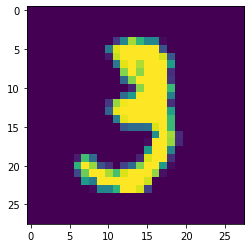

In [7]:
image, label = dataset[10]
plt.imshow(image)
print('Label:', label)

In [8]:
type(image)

PIL.Image.Image

In [9]:
# PyTorch datasets allow us to specify one or more transformation functions 
# which are applied to the images as they are loaded. torchvision.transforms 
# contains many such predefined functions, and we'll use the ToTensor transform 
# to convert images into PyTorch tensors.

import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [11]:
# The first dimension is used to keep track of the color channels.

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
# The values range from 0 to 1, with 0 representing black, 1 white and the 
# values in between different shades of grey. We can also plot the tensor as an 
# image using plt.imshow.

print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


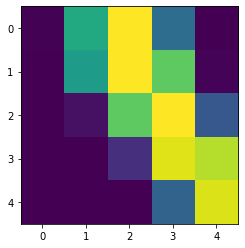

In [13]:
plt.imshow(img_tensor[0, 10:15, 10:15])

In [14]:
# Since there's no predefined validation set, we must manually split the 60,000 
# images into training and validation datasets. Let's set aside 10,000 randomly 
# chosen images for validation. We can do this using the random_spilt method 
# from PyTorch.

from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle= True)

## Model

- A logistic regression model is almost identical to a linear regression model i.e. there are weights and bias matrices, and the output is obtained using simple matrix operations (pred = x @ w.t() + b).

- Just as we did with linear regression, we can use nn.Linear to create the model instead of defining and initializing the matrices manually.

- Since nn.Linear expects the each training example to be a vector, each 1x28x28 image tensor needs to be flattened out into a vector of size 784 (28*28), before being passed into the model.

- The output for each image is vector of size 10, with each element of the vector signifying the probability a particular target label (i.e. 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0258, -0.0159,  0.0316,  ..., -0.0264, -0.0320,  0.0092],
        [ 0.0265, -0.0220, -0.0248,  ..., -0.0040,  0.0346, -0.0087],
        [-0.0135,  0.0341, -0.0214,  ...,  0.0193,  0.0190,  0.0352],
        ...,
        [-0.0197, -0.0123, -0.0079,  ..., -0.0012, -0.0130,  0.0181],
        [ 0.0083, -0.0209,  0.0085,  ..., -0.0311, -0.0251, -0.0272],
        [-0.0185,  0.0137,  0.0093,  ..., -0.0076, -0.0135, -0.0345]],
       requires_grad=True)


In [18]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0179, -0.0352,  0.0089, -0.0351, -0.0018, -0.0217,  0.0306,  0.0199,
         0.0014, -0.0169], requires_grad=True)


In [19]:
for images, labels in train_loader:
  print(labels.shape)
  print(images.shape)
  outputs = model(images)
  break

torch.Size([128])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

The errod was caused due to the fact 
that we have to reshape the input image into a 784 vector.

In [20]:
# We'll have to use the reshape method of a class.

# To include this additional functionality within our model, we need to define
# a custom model, by extending the nn.Module class from PyTorch.

# Inside the __init__ constructor method, we instantiate the weights and biases 
# using nn.Linear. And inside the forward method, which is invoked when we pass 
# a batch of inputs to the model, we flatten out the input tensor, and then 
# pass it into self.linear.

# xb.reshape(-1, 28*28) indicates to PyTorch that we want a view of the xb 
# tensor with two dimensions, where the length along the 2nd dimension is 
# 28*28 (i.e. 784). One argument to .reshape can be set to -1 (in this case 
# the first dimension), to let PyTorch figure it out automatically based on the 
# shape of the original tensor. Note that the model no longer has .weight and 
# .bias attributes (as they are now inside the .linear attribute), but it does 
# have a .parameters method which returns a list containing the weights and 
# bias, and can be used by a PyTorch optimizer.

class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [21]:
print(model.linear.weight.shape,  model.linear.bias.shape)
print(model.parameters())
print(list(model.parameters()))

torch.Size([10, 784]) torch.Size([10])
<generator object Module.parameters at 0x7fd281ee8780>
[Parameter containing:
tensor([[ 0.0340, -0.0194, -0.0299,  ..., -0.0018,  0.0166,  0.0298],
        [ 0.0205,  0.0329, -0.0223,  ...,  0.0074,  0.0227,  0.0094],
        [-0.0337, -0.0344, -0.0255,  ..., -0.0265,  0.0087,  0.0339],
        ...,
        [ 0.0233, -0.0125, -0.0057,  ...,  0.0092, -0.0130,  0.0174],
        [-0.0178,  0.0092, -0.0153,  ..., -0.0282,  0.0116, -0.0126],
        [ 0.0105, -0.0259,  0.0040,  ..., -0.0165, -0.0091,  0.0181]],
       requires_grad=True), Parameter containing:
tensor([-0.0297, -0.0261, -0.0158, -0.0283, -0.0086,  0.0220, -0.0297,  0.0058,
        -0.0191, -0.0346], requires_grad=True)]


In [22]:
# Our custom model will be used in the same way as before.

for images, labels in train_loader:
  outputs = model(images)
  break

print('Outputs Shape:', outputs.shape)
print('Sample Outputs', outputs[:2])

Outputs Shape: torch.Size([128, 10])
Sample Outputs tensor([[ 0.3554, -0.1549, -0.4622, -0.1086, -0.0988, -0.2481,  0.0095,  0.1160,
          0.4143,  0.4621],
        [ 0.0737,  0.1303,  0.2081, -0.1778,  0.0815,  0.0243, -0.0413, -0.3390,
          0.0485,  0.0651]], grad_fn=<SliceBackward>)


In [23]:
# The softmax function is included in the torch.nn.functional package, and 
# requires us to specify a dimension along which the softmax must be applied.

import torch.nn.functional as F

# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:", probs[:2])

# Add the probabilities of an output row
print("Sum:", torch.sum(probs[0]))

Sample probabilities: tensor([[0.1330, 0.0798, 0.0587, 0.0836, 0.0844, 0.0727, 0.0941, 0.1047, 0.1410,
         0.1479],
        [0.1057, 0.1119, 0.1209, 0.0822, 0.1065, 0.1006, 0.0942, 0.0700, 0.1031,
         0.1048]], grad_fn=<SliceBackward>)
Sum: tensor(1., grad_fn=<SumBackward0>)


In [24]:
# We can determine the maximum predicted element by just taking the the maximum
# probability. We use torch.max to get the maximum.

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 2, 7, 0, 8, 9, 9, 9, 9, 9, 6, 1, 7, 5, 1, 1, 9, 8, 8, 4, 1, 9, 0, 2,
        1, 9, 9, 1, 7, 1, 2, 1, 1, 7, 9, 9, 9, 3, 9, 0, 9, 9, 7, 9, 9, 7, 8, 9,
        5, 0, 9, 8, 9, 6, 8, 2, 9, 9, 6, 2, 7, 1, 9, 8, 6, 4, 8, 1, 5, 9, 4, 9,
        5, 1, 4, 7, 9, 9, 2, 0, 6, 4, 5, 2, 0, 0, 7, 9, 1, 8, 6, 0, 6, 8, 4, 5,
        4, 1, 1, 4, 0, 8, 5, 9, 9, 7, 0, 8, 9, 5, 9, 9, 4, 8, 6, 9, 4, 9, 9, 9,
        8, 9, 9, 9, 0, 8, 5, 0])
tensor([0.1479, 0.1209, 0.1567, 0.1227, 0.1106, 0.1317, 0.1114, 0.1206, 0.1413,
        0.1359, 0.1109, 0.1183, 0.1258, 0.1205, 0.1127, 0.1209, 0.1513, 0.1172,
        0.1403, 0.1164, 0.1226, 0.1304, 0.1171, 0.1153, 0.1149, 0.1283, 0.1244,
        0.1360, 0.1192, 0.1149, 0.1316, 0.1261, 0.1211, 0.1200, 0.1398, 0.1152,
        0.1261, 0.1224, 0.1502, 0.1261, 0.1298, 0.1470, 0.1291, 0.1266, 0.1362,
        0.1131, 0.1128, 0.1194, 0.1219, 0.1224, 0.1447, 0.1235, 0.1170, 0.1189,
        0.1219, 0.1273, 0.1327, 0.1471, 0.1196, 0.1150, 0.1217, 0.1121, 0.1226,
       

## Evaluation Metrics and Accuracy



In [31]:
# Use torch.Tensor.item() to get a Python number from a tensor containing a single value:

# >>> x = torch.tensor([[1]])
# >>> x
# tensor([[ 1]])
# >>> x.item()
# 1
# >>> x = torch.tensor(2.5)
# >>> x
# tensor(2.5000)
# >>> x.item()
# 2.5

def accuracy(outputs, labels):
  _ , preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==label).item() / len(preds))

In [32]:
accuracy(outputs, labels)

tensor(0.0703)